<a href="https://colab.research.google.com/github/NimsW20/EN3160-Assignments/blob/main/Copy_of_Assignment3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EN3160 Assignment 3 - Neural Networks**



*   Name - W. A. D. N. M. Wanniarachchi
*   Index no - 210679B
* [Github link](https://github.com/NimsW20/EN3160-Assignments/tree/main/Assignment%203)



## **Task 1**

Single dense layer network

100%|██████████| 170M/170M [00:13<00:00, 12.3MB/s]


Extracting  ./ data/cifar-10-python.tar.gz to  ./ data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769091210365295
Epoch 2/20, Loss: 0.9498501163721085
Epoch 3/20, Loss: 0.9361147961616516
Epoch 4/20, Loss: 0.9275584683418274
Epoch 5/20, Loss: 0.9216217896342278
Epoch 6/20, Loss: 0.917219340622425
Epoch 7/20, Loss: 0.9138082304596901
Epoch 8/20, Loss: 0.9110819209218025
Epoch 9/20, Loss: 0.9088529486060143
Epoch 10/20, Loss: 0.9069997741580009
Epoch 11/20, Loss: 0.905439357638359
Epoch 12/20, Loss: 0.9041115722060203
Epoch 13/20, Loss: 0.9029727745652198
Epoch 14/20, Loss: 0.9019890181422233
Epoch 15/20, Loss: 0.9011351467967034
Epoch 16/20, Loss: 0.9003899726867676
Epoch 17/20, Loss: 0.8997372288703919
Epoch 18/20, Loss: 0.8991635336875915
Epoch 19/20, Loss: 0.8986579467058182
Epoch 20/20, Loss: 0.8982111541628838


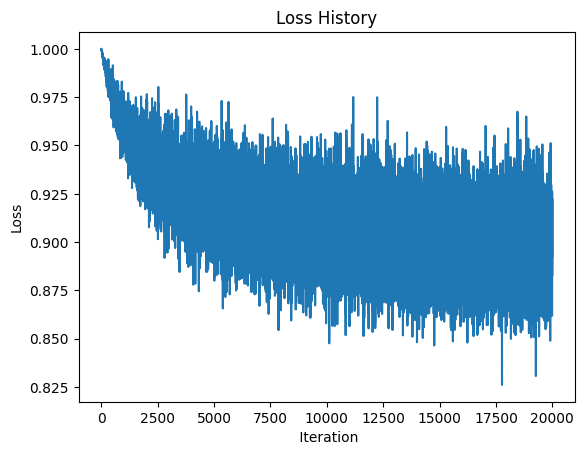

Training accuracy: 32.19%
Test accuracy: 32.39%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib. pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])
batch_size = 50
trainset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=True, download=True, transform=transform)
trainloader = torch. utils .data.DataLoader(trainset , batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=False ,download=True, transform=transform)
testloader = torch. utils .data.DataLoader( testset , batch_size=batch_size ,shuffle=False , num_workers=2)
classes = ( 'plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations ):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn. functional .one_hot(labels , K). float () # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w**2)
        loss_history .append( loss .item ())
        running_loss += loss .item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t ().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss / len(trainloader)}")
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt . plot (loss_history)
plt . title ( "Loss History" )
plt . xlabel ( " Iteration" )
plt . ylabel ( "Loss" )
plt .show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn. functional .one_hot(labels , K). float()

        # Forward pass
        y_train_pred = x_train .mm(w) + b
        predicted_train = torch .argmax(y_train_pred , dim=1)
        total_train += labels . size (0)
        correct_train += (predicted_train == labels ).sum(). item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()

        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels.size (0)
        correct_test += (predicted_test == labels ).sum(). item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Let's make the following adjustments to the above network.

1. Network architecture: a two-layer neural network with one hidden layer containing 100 neurons and a sigmoid activation function. This hidden layer adds non-linearity and allows the network to model more complex patterns. It now has two sets of weights (w1, w2) and biases (b1, b2).

2. Loss function: Cross-Entropy Loss is used, which is more appropriate for multi-class classification problems as it directly measures the difference between predicted class probabilities and true class labels.

3. Number of epochs: Runs for 10 epochs, with learning rate decay applied at the end of each epoch


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 2.1564, Training Accuracy: 17.08%
Epoch [2/10], Loss: 1.8963, Training Accuracy: 31.71%
Epoch [3/10], Loss: 1.8029, Training Accuracy: 35.84%
Epoch [4/10], Loss: 1.7490, Training Accuracy: 38.08%
Epoch [5/10], Loss: 1.7107, Training Accuracy: 39.91%
Epoch [6/10], Loss: 1.6830, Training Accuracy: 41.20%
Epoch [7/10], Loss: 1.6610, Training Accuracy: 41.92%
Epoch [8/10], Loss: 1.6431, Training Accuracy: 42.91%
Epoch [9/10], Loss: 1.6271, Training Accuracy: 43.52%
Epoch [10/10], Loss: 1.6137, Training Accuracy: 44.18%


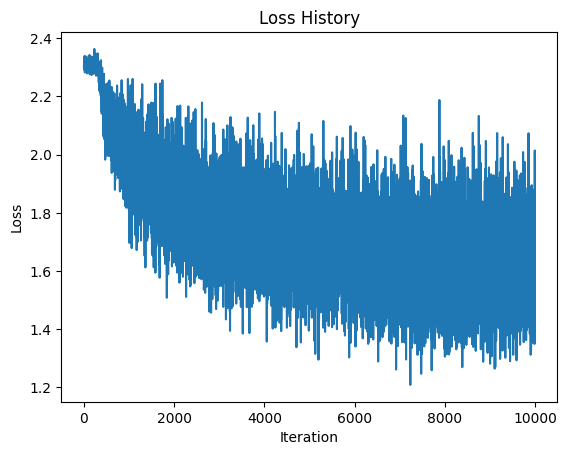

Training accuracy: 44.49%
Test accuracy: 43.24%


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR10 image size)
H = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std
b2 = torch.zeros(K)

# Hyperparameters
iterations = 10
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# Cross-Entropy Loss Function
def cross_entropy_loss(y_pred, y_true):
    return -torch.sum(y_true * torch.log(y_pred + 1e-9)) / y_true.shape[0]

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass - Hidden Layer
        hidden_output = sigmoid(x_train.mm(w1) + b1)
        # Forward pass - Output Layer
        y_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = cross_entropy_loss(y_pred, y_train_onehot) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = y_pred - y_train_onehot
        dw2 = hidden_output.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dhidden = dy_pred.mm(w2.t()) * hidden_output * (1 - hidden_output)
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

        # Calculate accuracy
        _, predicted = torch.max(y_pred, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{t + 1}/{iterations}], Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden_output = sigmoid(x_train.mm(w1) + b1)
        y_train_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden_output = sigmoid(x_test.mm(w1) + b1)
        y_test_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Both the test and training accuracies have improved fairly (by about 10%) due to the addition of the middle layer of neurons.

## **Task 2**

The LeNet-5 network architecture here is adapted for the MNIST dataset, handling single-channel grayscale images. The architecture consists of two convolutional layers, two average pooling layers, and three fully connected layers, making it effective for classifying handwritten digits.

1. Convolutional Layers:
The network includes two convolutional layers. The first convolutional layer has 6 filters of size 5×5 and the second has 16 filters of the same size. These layers use ReLU activations.

2. Average Pooling Layers:
Each convolutional layer is followed by an average pooling layer with a
2×2 kernel.

3. Fully Connected Layers:
The network has three fully connected layers with 120, 84, and 10 output nodes, respectively. The last layer outputs a 10-dimensional vector for the 10 classes of handwritten digits (0-9).

4. Cross-Entropy Loss:
This loss function measures the difference between the predicted and true class probabilities.

5. Adam Optimizer:
The Adam optimizer is used to adjust the network’s weights efficiently. This leads to faster and more stable convergence.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 1x28x28, Output: 6x28x28
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)                 # Output: 6x14x14
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)            # Output: 16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)  # Flatten for fully connected layer
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Load the data

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizing to MNIST dataset mean and std
])

# Load train and test data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 422kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.93MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.97MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Train and evaluate

Epoch [1/10], Train Loss: 0.2909, Train Accuracy: 91.21%, Test Accuracy: 97.19%
Epoch [2/10], Train Loss: 0.0839, Train Accuracy: 97.40%, Test Accuracy: 98.46%
Epoch [3/10], Train Loss: 0.0585, Train Accuracy: 98.18%, Test Accuracy: 98.56%
Epoch [4/10], Train Loss: 0.0466, Train Accuracy: 98.51%, Test Accuracy: 98.79%
Epoch [5/10], Train Loss: 0.0400, Train Accuracy: 98.75%, Test Accuracy: 98.86%
Epoch [6/10], Train Loss: 0.0332, Train Accuracy: 98.94%, Test Accuracy: 98.76%
Epoch [7/10], Train Loss: 0.0274, Train Accuracy: 99.13%, Test Accuracy: 98.78%
Epoch [8/10], Train Loss: 0.0251, Train Accuracy: 99.18%, Test Accuracy: 98.76%
Epoch [9/10], Train Loss: 0.0214, Train Accuracy: 99.33%, Test Accuracy: 98.88%
Epoch [10/10], Train Loss: 0.0180, Train Accuracy: 99.42%, Test Accuracy: 98.95%

Final Training Accuracy: 99.42%
Final Test Accuracy: 98.95%


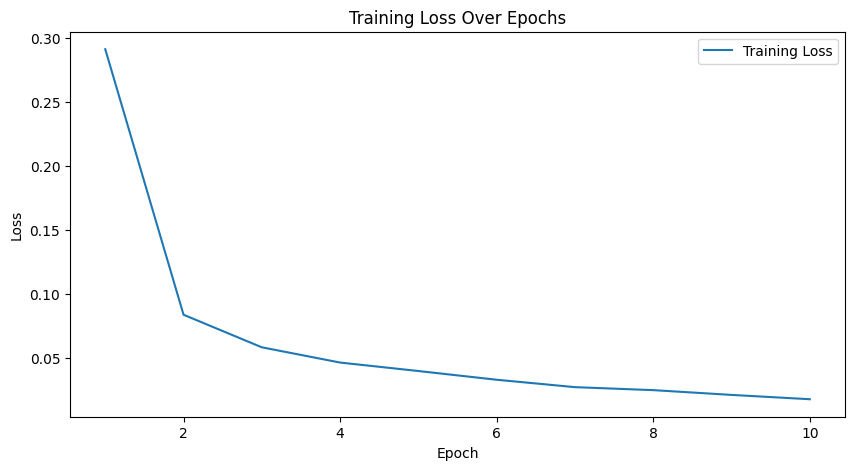

In [ ]:
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy
train_losses = []
train_accuracies = []
test_accuracies = []

# Training and Evaluation Loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training
    model.train()
    correct_train, total_train = 0, 0
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate and store average training loss for this epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Calculate and store training accuracy for this epoch
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Testing
    model.eval()
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# Final train and test accuracy after all epochs
final_train_accuracy = train_accuracies[-1]
final_test_accuracy = test_accuracies[-1]

print(f"\nFinal Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Plotting Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()


## **Task 3 - Transfer Learning with ResNet-18: Hymenoptera Dataset Classification**

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Visualize a few images

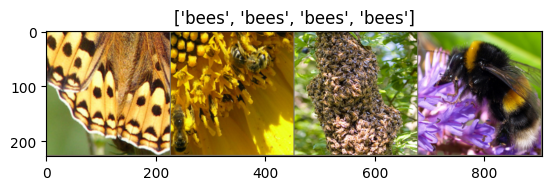

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Function for training the model

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

Function for visualizing the model predictions

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### **Finetuning the ConvNet:**

Load the pretrained model and reset final fully connected layer.

Objective: In fine-tuning, we slightly modify the pre-trained network to adapt it to our specific task. This involves updating the weights of the entire model so that it learns features relevant to the Hymenoptera dataset, while still benefiting from its prior training on ImageNet.

In [ ]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


Train and evaluate

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5251 Acc: 0.7336
val Loss: 0.2118 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.4219 Acc: 0.8156
val Loss: 0.4364 Acc: 0.8301

Epoch 2/24
----------
train Loss: 0.3978 Acc: 0.8197
val Loss: 0.2967 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.6692 Acc: 0.7582
val Loss: 0.4368 Acc: 0.8824

Epoch 4/24
----------
train Loss: 0.5647 Acc: 0.8074
val Loss: 0.4587 Acc: 0.8366

Epoch 5/24
----------
train Loss: 0.8135 Acc: 0.7541
val Loss: 0.2974 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.5143 Acc: 0.8156
val Loss: 0.3225 Acc: 0.8824

Epoch 7/24
----------
train Loss: 0.4430 Acc: 0.8074
val Loss: 0.2657 Acc: 0.9020

Epoch 8/24
----------
train Loss: 0.3477 Acc: 0.8566
val Loss: 0.2234 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.3486 Acc: 0.8484
val Loss: 0.2320 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.3596 Acc: 0.8279
val Loss: 0.2192 Acc: 0.9020

Epoch 11/24
----------
train Loss: 0.2806 Acc: 0.8648
val Loss: 0.2319 Acc: 0.9020

Ep

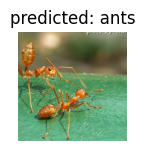

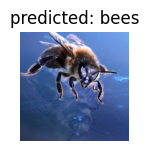

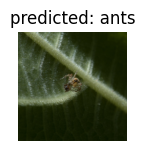

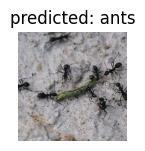

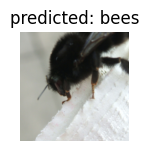

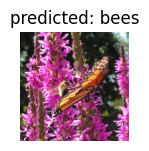

In [ ]:
visualize_model(model_ft)

### **ConvNet as fixed feature extractor**

Objective: In this approach, the pre-trained ResNet-18 model serves as a fixed feature extractor, meaning only the last fully connected layer is trained. This is done by setting "*param.requires_grad = False*" for each parameter. This prevents any weight updates in these layers, so they act solely as a feature extractor.

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Train and evaluate

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.3773 Acc: 0.8402


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


val Loss: 0.1977 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.3543 Acc: 0.8443
val Loss: 0.1915 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.3815 Acc: 0.8279
val Loss: 0.1750 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.3042 Acc: 0.8484
val Loss: 0.1863 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.3986 Acc: 0.8197
val Loss: 0.1842 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.3518 Acc: 0.8361
val Loss: 0.1795 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.4880 Acc: 0.8074
val Loss: 0.1760 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.4017 Acc: 0.8074
val Loss: 0.1871 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.4315 Acc: 0.7910
val Loss: 0.1951 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.3648 Acc: 0.8402
val Loss: 0.1740 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3490 Acc: 0.8443
val Loss: 0.1843 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3941 Acc: 0.8484
val Loss: 0.1865 Acc: 0.9150

Epoch 12/24
----------
train Loss: 0.3812 Acc: 0.8320
v

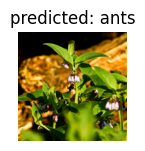

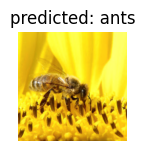

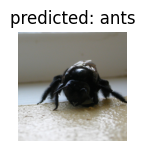

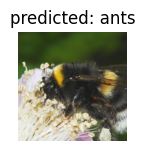

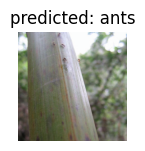

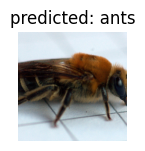

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Inference on custom images:

Use the trained model to make predictions on custom images and visualize the predicted class labels along with the images.

In [ ]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

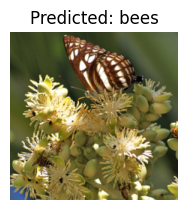

In [ ]:
visualize_model_predictions(
    model_conv,
    img_path='/content/drive/MyDrive/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

## Interpretation of results

* Validation accuracy of finetuning model - 92.16%
* Validation accuracy of the fixed feature extractor - 94.77%

The feature extraction approach, freezes the earlier layers of ResNet18 and only trains the final fully connected layer. It has performed slightly better than the fine-tuning approach. This result suggests that the pretrained ResNet18 model's feature representations, learned from the ImageNet1K dataset, are highly generalizable to the hymenoptera dataset of ants and bees classification.

Fine-tuning all layers typically allows the model to adapt more specifically to the new dataset, but it can sometimes lead to overfitting, especially when the new dataset is small or similar to the original training data. Here, fine-tuning performed well but not as strong as the fixed feature extractor in accuracy.

**Recommendation:**

Hence this results suggests using ResNet18 as a feature extractor to be a better approach for this classification task. It provides higher accuracy with fewer computational resources.